In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# select l.term_frequency, l.principal_amount, count(l.id) 
# from m_client c inner join m_loan l on l.client_id=c.id
# where l.`term_period_frequency_enum`=2 and l.`loan_status_id`=300
# group by l.`term_frequency`, l.`principal_amount`;

df = pd.read_csv('countByTenureAndPrincipal.csv')
print(df)
totalCount = 0
totalAmount = 0
for index, row in df.iterrows():
    totalCount += row["count"]
    totalAmount += row["count"]*row["principal_amount"]
print("Total Count of Loans - " + str(totalCount))
print("Active portfolio amount - " + str(totalAmount))


    term_frequency  principal_amount   count
0               12             10000      46
1               12             50000      58
2               18             12000      29
3               21              3000  101819
4               21              5000  346683
5               24             10000      17
6               24             41234      14
7               24             50000     105
8               25             15000      44
9               26             12000      13
10              26             15000    1814
11              52             10000     646
12              52             12000    1094
13              52             15000  144896
14              52             20000  126981
15              52             25000  123713
16              52             30000   97987
17             104             20000   18361
18             104             25000  196558
19             104             30000   89775
20             104             40000    1431
21        

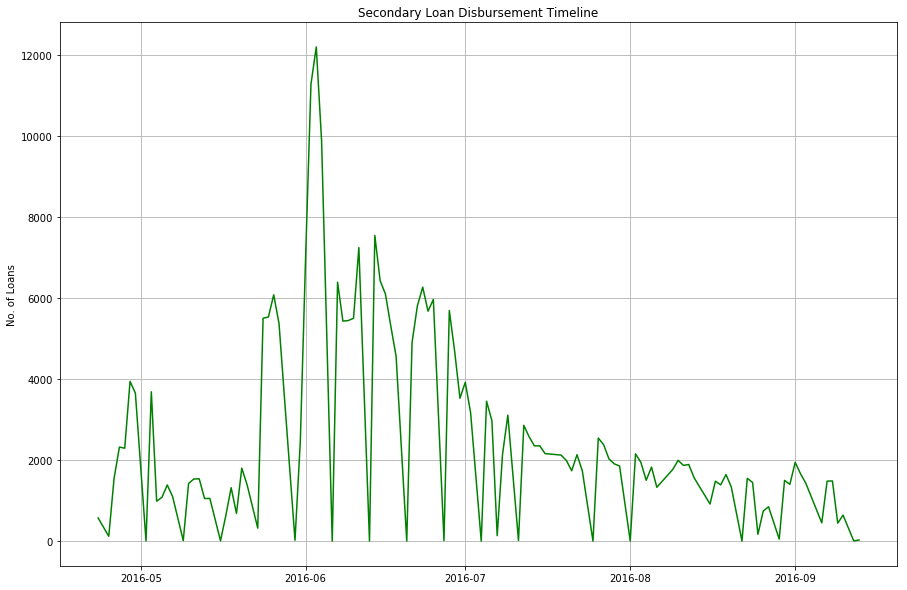

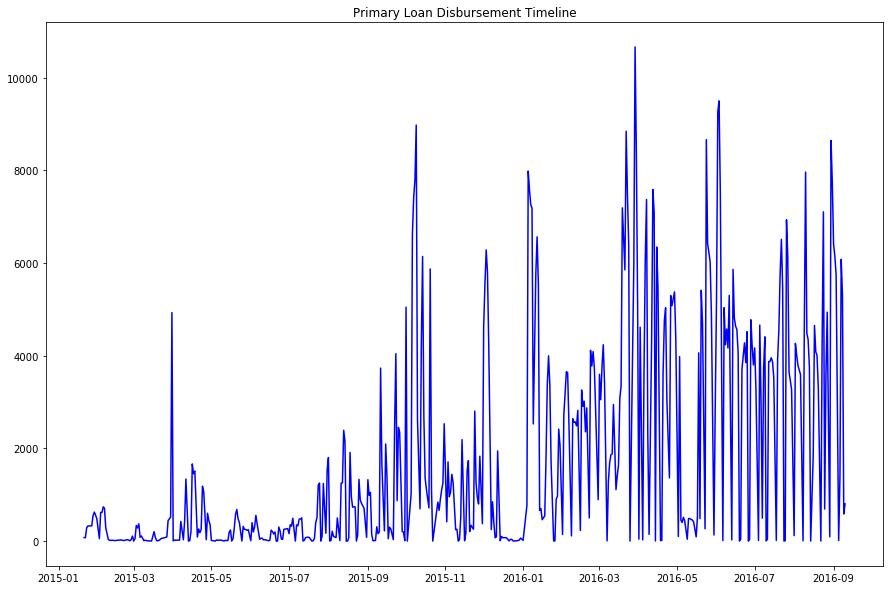

In [29]:
#Since migration data does not clearly demarcate between primary and secondary loans,
#assumptions are made that the loan with less tenure and principal amount for parallel active loans
#is considered as secondary.

import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import strpdate2num

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

#primaryDisbursements = pd.read_csv('primaryDisbursements.csv')
#secondaryDisbursements = pd.read_csv('secondaryDisbursements.csv')
disbDate, count = np.loadtxt("secondaryDisbursements.csv", delimiter=',', skiprows=1, unpack=True, converters={0:bytespdate2num('%Y-%m-%d')})

plt.figure(figsize=(15,10))
plt.plot_date(x=disbDate, y=count, fmt="g-")
plt.title("Secondary Loan Disbursement Timeline")
plt.ylabel("No. of Loans")
plt.grid(True)
plt.show()

disbDate, count = np.loadtxt("primaryDisbursements.csv", delimiter=',', skiprows=1, unpack=True, converters={0:bytespdate2num('%Y-%m-%d')})
plt.figure(figsize=(15,10))
plt.plot_date(x=disbDate, y=count, fmt="b-")
plt.title("Primary Loan Disbursement Timeline")
plt.show()

In [32]:
#Attempting time series decomposition
import statsmodels.api as sm

df = pd.read_csv('secondaryDisbursements.csv')
df.index = pd.DatetimeIndex(df["disbDate"]) 
df = df.resample('M').mean() 
print(df.head()) 
flow = df['count']
res = sm.tsa.seasonal_decompose(flow)  
fig = res.plot()  
fig.show() 


                  count
disbDate               
2016-04-30  2065.857143
2016-05-31  1906.961538
2016-06-30  5497.615385
2016-07-31  2067.280000
2016-08-31  1293.520000


/Users/avik/anaconda/lib/python3.6/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


ValueError: operands could not be broadcast together with shapes (6,) (20,) 